In [ ]:
#Packages to load into google colab/python notebook...etc.
import os
print os.getcwd()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import np_utils
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import keras 
from keras import Sequential
from keras import models
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten,Dropout,BatchNormalization
from keras.models import Model
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras import regularizers

Using TensorFlow backend.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Introduction**

---
![Hosted by the National Institute of Standards and Technology (NIST), the EMNIST database contains many images of handwritten digits and characters [1].
The EMNIST Letters dataset contains handwritten images of uppercase and lowercase letters of the English alphabet. The biggest problem with this data set is the inclusion of both upper and lowercase letters, which causes misclassification images with similar features. For example, lowercase l and capital I look very similar to the models leading to the misclassify one and/or the other. In this report we will train several machine learning models to correctly classify both upper and lower case letters with their respective labels. Our project objective is to use several different machine learning models correctly label each image with its corrosponding label.](https://)

In [ ]:
#Functions for the Dataset
#Recoding the values in the dataset
def recodingLabels_Characters(series):
    if series == 1:
       return 'A'
    elif series == 2:
       return 'B'
    elif series == 3:
       return 'C'
    elif series == 4:
       return 'D'
    elif series == 5:
       return 'E'
    elif series == 6:
       return 'F'
    elif series == 7:
       return 'G'
    elif series == 8:
       return 'H'
    elif series == 9:
       return 'I'
    elif series == 10:
       return 'J'
    elif series == 11:
       return 'K'
    elif series == 12:
       return "L"
    elif series == 13: 
       return "M"
    elif series == 14:
       return "N"
    elif series == 15:
       return "O"
    elif series == 16:
       return "P"
    elif series == 17:
       return "Q"
    elif series == 18:
       return "R"
    elif series == 19:
       return "S"
    elif series == 20:
       return "T"
    elif series == 21:
       return "U"
    elif series == 22:
       return "V"
    elif series == 23:
       return "W"
    elif series == 24:
       return "X"
    elif series == 25:
       return "Y"
    elif series == 26:
       return "Z"

def recodingLabels_Numbers(series):
    if series == 'A':
       return 1
    elif series == 'B':
       return 2
    elif series == 'C':
       return 3
    elif series == 'D':
       return 4
    elif series == 'E':
       return 5
    elif series == 'F':
       return 6
    elif series == 'G':
       return 7
    elif series == 'H':
       return 8
    elif series == 'I':
       return 9
    elif series == 'J':
       return 10
    elif series == 'K':
       return 11
    elif series == 'L':
       return 12
    elif series == 'M': 
       return 13 
    elif series == 'N':
       return 14
    elif series == 'O':
       return 15
    elif series == 'P':
       return 16
    elif series == 'Q':
       return 17
    elif series == 'R':
       return 18
    elif series == 'S':
       return 19
    elif series == 'T':
       return 20
    elif series == 'U':
       return 21
    elif series == 'V':
       return 22 
    elif series == 'W':
       return 23
    elif series == 'X':
       return 24
    elif series == 'Y':
       return 25
    elif series == 'Z':
       return 26

#Convolutional Neural Network Structure
def CNN_model():
    model = Sequential()
    model.add(Conv2D(512, kernel_size = (3,3),
                     activation='relu', input_shape = 
                     input_shape),)
    model.add(Conv2D(256, 
              kernel_size = (3,3), 
              activation='relu'))
    model.add(Dropout(0.40))
    model.add(MaxPooling2D(strides=(2,2)))
    model.add(Conv2D(128,kernel_size=(3,3),
                     activation='relu',
                     kernel_regularizer=regularizers.l2(0.03), 
                     bias_regularizer=regularizers.l2(0.03)))
    model.add(Dropout(0.40))
    model.add(Conv2D(64,
                     kernel_size=(3,3), 
                     activation='relu'))
    model.add(Dropout(0.40))
    model.add(MaxPooling2D(strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(27,activation='softmax'))
    return model


In [ ]:
#Load in data via files***
#This will load all of the data
X_train = pd.read_csv("/content/drive/My Drive/emnist/emnist-letters-train.csv", 
                      header = None)
X_test  = pd.read_csv("/content/drive/My Drive/emnist/emnist-letters-test.csv", 
                      header = None)

#Adding labels column in the X dataset
X = pd.concat([X_train, X_test]).reset_index(drop=True)
X["Letter"] = pd.Categorical(X[0].apply(recodingLabels_Characters))
y = np.array(X['Letter'])
X = X.drop(columns=[0,"Letter"])

#Recoding the columns in the dataset
feature_cols = ['pixel_' +  str(i) for i in range(1,X.shape[1]+1)]
X.columns = feature_cols

In [ ]:
#Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X[feature_cols].values, 
                                                    y, 
                                                    train_size = 0.7)
#Normalizing the dataset into values between[0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


X_train = pd.DataFrame(X_train, columns=feature_cols)
X_test = pd.DataFrame(X_test, columns=feature_cols)
X_train['Label'] = y_train
X_test['Label'] = y_test

# Training and Testing Datasets and Data Pre-Processing
---
There are 103600 images contained in the EMNIST-Letters dataset.  Each image is represented as 28 x 28 grayscale image with pixel values ranging from 0 to 255. The data will be preprocessed via normalization by dividing the pixel intensity by 255. Using scikit-learn, the dataset will be randomly split into training and testing datasets with 70% of the images in the training dataset and 30% of the images in the testing dataset. Each model in this report used the same subsets for both training and testing. 


Total Number of Training Images: 5180


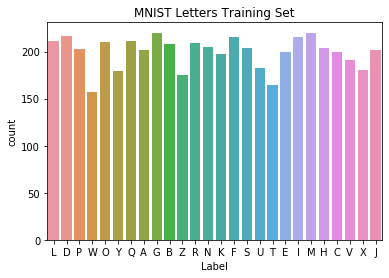

<Figure size 2880x2880 with 0 Axes>

In [ ]:
#Looking at the number of samples in each of the training and testing sets
sns.countplot(X_train['Label'])
plt.title("MNIST Letters Training Set")
plt.figure(figsize=(40,40))
print('Total Number of Training Images:', str(X_train.shape[0]))

Total Number of Testing Images: 98420


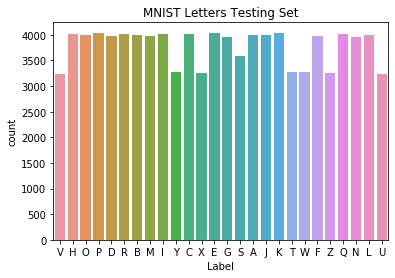

<Figure size 2880x2880 with 0 Axes>

In [ ]:
sns.countplot(X_test['Label'])
plt.title("MNIST Letters Testing Set")
plt.figure(figsize=(40,40))
print('Total Number of Testing Images:', str(X_test.shape[0]))

# Image Pre-Processing and Explanatory Data Analysis 
---
The images in the datasets are formatted as a 784 array of pixels. In order to 
plot the images in python, each image has to be reshaped into 28 x 28 matrices. In addition, the labels of images are one-hot encoded in order for the machine learning models to recognize the 26 different letter classes. Shown below are some training images in the dataset.  

In [ ]:
#Reshaping the training and testing data into images
X_train_img = np.array(X_train[feature_cols])
X_train_img = X_train_img.reshape(X_train_img.shape[0],28,28,1)
X_test_img = np.array(X_test[feature_cols])
X_test_img = X_test_img.reshape(X_test_img.shape[0],28,28,1)

y_train_img = pd.DataFrame(y_train)
y_train_img = y_train_img[0].apply(recodingLabels_Numbers)
y_train_img = to_categorical(y_train_img)
y_test_img = pd.DataFrame(y_test)
y_test_img = y_test_img[0].apply(recodingLabels_Numbers)
y_test_img = to_categorical(y_test_img)


In [ ]:
#image dimensions
a = 28
N = 1

X_train_Gr_img_T = []
# 784 columns correspond to 28x28 image
X_train_Gr_img = np.array(X_train[feature_cols]).astype(float)
X_train_Gr_img = X_train_img.reshape(X_train_img.shape[0],28,28)

for i in range(X_train_Gr_img.shape[0]):
    X_train_Gr_img_T.append(X_train_Gr_img[i,:,:].T)

Training Set Images:


<Figure size 144x144 with 0 Axes>

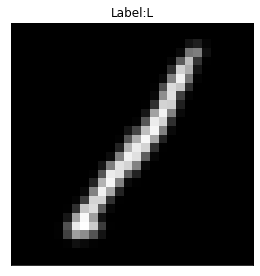

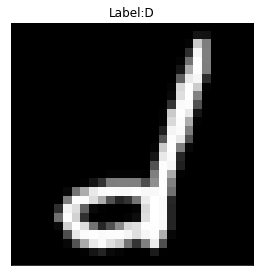

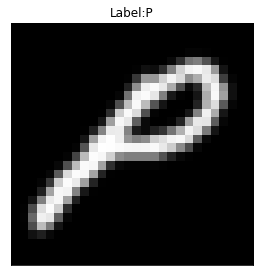

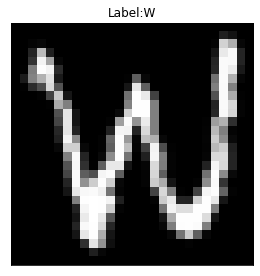

In [ ]:
#Visualizing the training images
n = 4
plt.figure(figsize=(2, 2))
print("Training Set Images:")
for i in range(n):
    plt.figure(figsize = (20,10))
    ax = plt.subplot(2, n, i + 1)
    plt.title("Label:" + str(y_train[i]))
    plt.imshow(X_train_Gr_img_T[i], cmap='gray_r')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

#Dimensional Reduction Algorithms (Part 1)
---
Visualizing the letter images in the EMNIST-Letters dataset is difficult since the images are represented in a high-dimensional dataset (784 pixels for each image). There are statistical and machine learning algorithms to reduce the number of dimensions of the images allowing for the visualization of the images in a two dimensional space. One of the best machine learning algorithms for this job is t-distributed stochastic neighoring embedding (t-SNE). It uses a non-linear approach where it plots the images in a lower dimensional space such that similar images are closer to one another. From the graph shown below,there are multiple homogenous and heterogenous clusters being respresented in the two dimensional space. The graph shows images with the same label are being clustered based on the similar features. However, there are heterogenous image clusters which include images from different labels. This indicates the images from different labels have similar features with other images. Other approaches (not plotted in this report) such as Principal Component Analysis (PCA) have failed to reduce dimensions of the image such that similarity between the images are apperent.

In [ ]:
#Comparing all T-SNE graphs
tsne = TSNE(learning_rate = 200, n_components = 2, random_state = 123, 
                  perplexity = 40, n_iter = 1000, verbose = 1)
X_training_copy = X_train.copy()
data_subset = X_training_copy[feature_cols].values
y_training_subset = y_train
tsne_results = tsne.fit_transform(data_subset)
n_colors = len(np.unique(y_train[0]))


#Plotting the T-sne plot in seaborn
X_training_copy['tsne-2d-one'] = tsne_results[:,0]
X_training_copy['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls",n_colors = n_colors),
    hue = 'Label',
    data = X_training_copy,
    legend="full",
    alpha=0.3
)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5180 samples in 0.125s...


#Dimensional Reduction Algorithms (Part 2)
---
Another approach to reduce the dimensions of a dataset is Truncated Singular Value Decomposition (TSVD). This statistical algorithm uses a linear approach to reduce the dimensions of the images allowing for the a projection in two dimensional space. TSVD is very popular to use for images when the majority of the pixels values are 0. After reducing the dimensions of the training set, t-SNE was used to also reduce the number of dimensions of the TSVD results. From the graph below, there are multiple homogenous and heterogenous clusters being respresented in the two dimensional space. Compared to the previous t-SNE result above, this plot shown to have more compact clusters compared to the previous plot. 

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5180 samples in 0.014s...
[t-SNE] Computed neighbors for 5180 samples in 3.239s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5180
[t-SNE] Computed conditional probabilities for sample 2000 / 5180
[t-SNE] Computed conditional probabilities for sample 3000 / 5180
[t-SNE] Computed conditional probabilities for sample 4000 / 5180
[t-SNE] Computed conditional probabilities for sample 5000 / 5180
[t-SNE] Computed conditional probabilities for sample 5180 / 5180
[t-SNE] Mean sigma: 2.550993
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.979446
[t-SNE] KL divergence after 1000 iterations: 1.862117


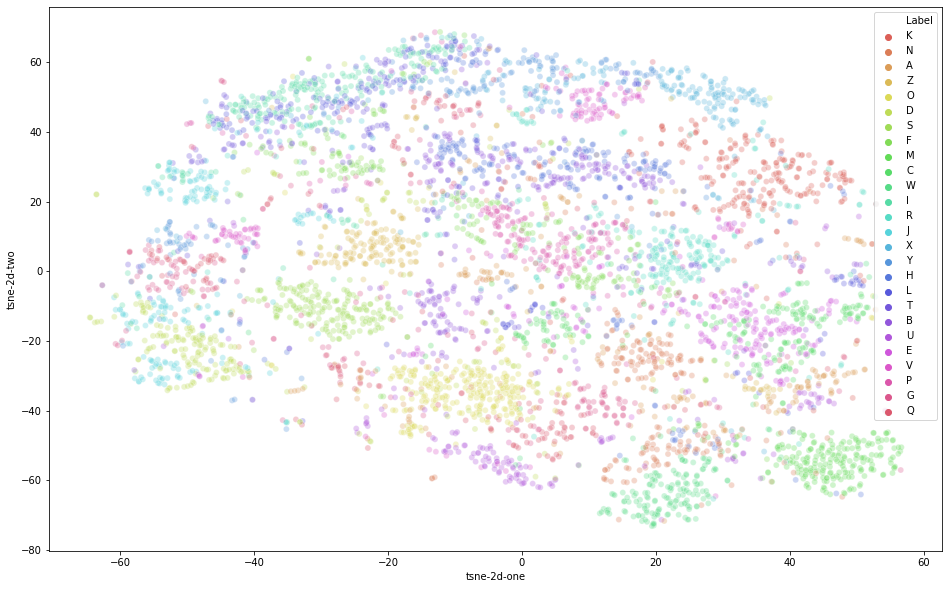

In [ ]:
#Dimensional Reduction using TSVD and T-SNE 
np.random.seed(42)
data_subset = X_train[feature_cols].values

#TSVD Implementation for TSNE
tsvd = TruncatedSVD(n_components = 50)
X_TSVD = tsvd.fit_transform(data_subset)
tsne_results = tsne.fit_transform(X_TSVD)
n_colors = len(np.unique(y_train[0]))


#Plotting the T-sne plot in seaborn
X_training_copy['tsne-2d-one'] = tsne_results[:,0]
X_training_copy['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls",n_colors = n_colors),
    hue = "Label",
    data = X_training_copy,
    legend="full",
    alpha=0.3
)

In [ ]:
#Defining training and testing data
import random
random.seed(69)
x_train, x_test, y_train, y_test = train_test_split(X[feature_cols].values,
                                                    y, 
                                                    train_size = 0.7)

x_train = x_train.astype('float') / 255.
x_test = x_test.astype('float') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# The Perceptron

---


The first model that we created was the perceptron. After 1000 iterations with a learning rate of 0.01, we got an accuracy of 58% indicating the use for a better model is needed. When the penalty parameter was added, the accuracy worsened by 7%. The max score obtained by the perceptron was 58%.


In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

ppn = Perceptron(max_iter=1000, eta0=0.01, random_state=0)
ppn.fit(x_train, y_train)

y_pred = ppn.predict(x_test)


print('Perceptron Accuracy: %.2f' % accuracy_score(y_test, y_pred))


ppn = Perceptron(max_iter=1000, penalty = 'l2', eta0=0.01, random_state=0)
ppn.fit(x_train, y_train)

y_pred1 = ppn.predict(x_test)

print('Perceptron + L2 Penalty Accuracy: %.2f' % accuracy_score(y_test, y_pred1))



Perceptron Accuracy: 0.57
Perceptron + L2 Penalty Accuracy: 0.56


# Support Vector Machine


---


The second machine learning model we used was a Support Vector Machine 
(SVM). Using the linear kernel for the dataset, discriminating the images by 
using a separating hyperplane. Through this model, we have achieved an accuracy of 77% which was and improvement over the Perceptron model.

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

y_pred = svclassifier.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 920   11   10   39   13   11   34   39    2    2   12    3   17   52
    25   11   26    9    4    1   14    2    5    2    4   11]
 [  19 1023    1   29   11    2   42   35    2    9    3    6    4   10
    11    1    6    5    3    0    3    0    2    3    1    6]
 [  11    2 1185    3   44    2   22    0    2    4    3    6    1    2
    30    3    9    3    2    8    3    2    0    1    1    1]
 [  21   82    5  946    3    2   10   13    6   26    9    7    1    4
    42    8    8    1    1    1    4    0    3    1    3    6]
 [  31   26   86    4 1057   11   13    2    3    2    8    4    0    3
     7    3    9   19    3   17    6    0    0    0    0    3]
 [  12    3    3    4    6 1017   16    3   15    4    6    5    1    1
     0   74   15   22    3   56    1    0    0    2    5    3]
 [  69   52   15   24   10   14  716    7    2   28    3    2    5    1
     3    3  221    2   29    6    4    1    5    3   11   10]
 [  47   18    0   16    2    3    3 1009   16    1   2

## After training and testing the model we can plot the confusion matrix with the code below:

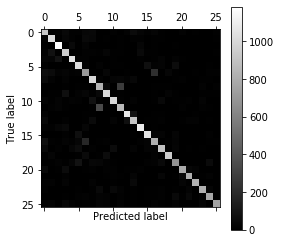

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
plt.matshow(conf_mat)
plt.figure(figsize=(16,10))
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
y_test = to_categorical(y_test)

ValueError: ignored

# Logistic Regression


---
Logistic regression is derived from the multiple regression model. It takes the exp(beta) for all betas (which in our case is a pixel) and classifies the image based on its closest log value is.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


      Logistic Regression Classfication


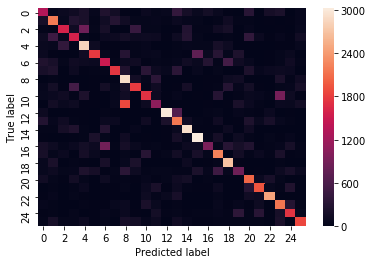

Test Accuracy: 0.5060631342038378


In [ ]:
from sklearn.linear_model import LogisticRegression
X_train_values = x_train
X_test_values = x_test
y_train_values = y_train
y_test_values = y_test


logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(confusion_matrix)

print('      Logistic Regression Classfication')
sns.heatmap(df_cm)
plt.figure(figsize=(16,10))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Accuracy of the model
score = logisticRegr.score(X_test_values, y_test_values)
print('Test Accuracy:', str(score))

# Convolutional Neural Network
---
A convolutional neural network or CNN is a type of neural network that takes in a list of matrices and assigns them weights and biases. From the weights and biases, the CNN is able to detect features, similarities, and differences images have from one another. The code below plots the training accuracy, testing accuracy, and loss for the trained CNN.

In [ ]:
#CNN
#Parameters for the model 
num_classes = 27
epochs = 50
batch_size = 128
input_shape =  (28,28,1)
 
#Model of the network
model = CNN_model()
model.summary()
 
#Compiling the Neural Network
model.compile(optimizer='adam', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
 
history = model.fit(X_train_img, y_train_img,
          epochs=epochs,
          verbose=1,
          batch_size = batch_size,
          validation_data=(X_test_img, y_test_img))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 512)       5120      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 256)       1179904   
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       295040    
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 10, 128)       0         


In [ ]:
#Graphics for CNN with explanation
score = model.evaluate(X_test_img, y_test_img, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
 
y_pred_img = model.predict(X_test_img).ravel()

Test loss: 0.4362909341871048
Test accuracy: 0.8856431619565289


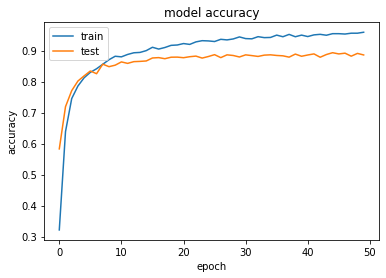

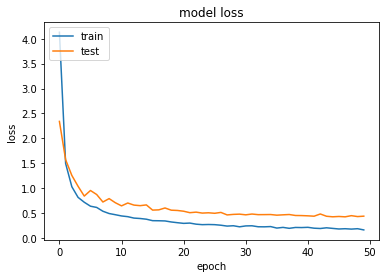

In [ ]:
#Plotting the Accuracy and the Loss for CNN
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# Conclusion
---
Overall the convolutional neural network performed the best with an accuracy of 93%. The perceptron, SVM, and logistic regression gave accuracies of 58%, 77% and 69% respectively.  This result was expected as a CNN tends to perform significantly better with image classification than the basic machine learning algorithms. In addition, the runtime for the CNN was noticably faster than the other machine learning models we trained. However, as we see from the above graphs, the model's testing accuracy converged at 93% within 10 to 20 epoches. After so many epoches, the training accuracy overtakes the testing accuracy leading to the model overfitting the training data. Similarily,
the training loss converges to zero faster when compared to the testing loss. Future improvements for this CNN will be to add Batch Normalization to further reduce overfitting of the model and speed up training time of the CNN.  

# Sources


---
[1] Cohen, G., Afshar, S., Tapson, J., & van Schaik, A. (2017). EMNIST: an extension of MNIST to handwritten letters. Retrieved from http://arxiv.org/abs/1702.05373

[2] Raschka, Sebastian. Python Machine Learning.  Packt, 2015.
